# IMPORT FILES AND LIBRARIES

In [1]:
#importing all necessary framework
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the csv file
df=pd.read_csv("D:\CHURN PROJECT\PROJECT1\churn-buster-main\Data\churn-in-telecoms-dataset.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# DATA CLEANING

In [4]:
#checking the datatypes
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
#checking for null values
df.isnull().head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#total count of null value in the datasets
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
#to map variables in attributes with boolean values 
boolean_dict={"yes":True,"no":False}
df['international plan']=df['international plan'].map(boolean_dict)
df['voice mail plan']=df['voice mail plan'].map(boolean_dict)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   bool   
 5   voice mail plan         3333 non-null   bool   
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
#to identify the unique values in each attribute
print(f'total unique phone numbers: {len(df["phone number"].unique())}')
print(f'total unique area codes: {len(df["area code"].unique())}')
print(f'total unique states: {len(df["state"].unique())}')
print(f'total unique plan values: {len(df["voice mail plan"].unique())}')
print(f'total Unique vmail messages values: {len(df["number vmail messages"].unique())}')

total unique phone numbers: 3333
total unique area codes: 3
total unique states: 51
total unique plan values: 2
total Unique vmail messages values: 46


In [10]:
#to balance the churn variable
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

# EXPLORATORY DATA ANALYSIS

In [11]:
df_categorical = df[['state', 'area code', 'international plan','voice mail plan']]
df_categorical['churn'] = df[['churn']]

In [12]:
# for doubtful area codes
df_categorical.value_counts()

state  area code  international plan  voice mail plan  churn
WV     415        False               False            False    36
NY     415        False               False            False    27
OR     415        False               False            False    25
MN     415        False               False            False    25
AL     415        False               False            False    25
                                                                ..
NJ     510        True                False            True      1
                  False               True             False     1
GA     510        True                False            True      1
NJ     415        True                True             False     1
NY     415        False               True             True      1
Length: 691, dtype: int64

In [13]:
#Exploring retained customers
df[df['churn'] == False].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


In [14]:
df_categorical.value_counts()

state  area code  international plan  voice mail plan  churn
WV     415        False               False            False    36
NY     415        False               False            False    27
OR     415        False               False            False    25
MN     415        False               False            False    25
AL     415        False               False            False    25
                                                                ..
NJ     510        True                False            True      1
                  False               True             False     1
GA     510        True                False            True      1
NJ     415        True                True             False     1
NY     415        False               True             True      1
Length: 691, dtype: int64

In [15]:
df_categorical.columns

Index(['state', 'area code', 'international plan', 'voice mail plan', 'churn'], dtype='object')

<AxesSubplot:>

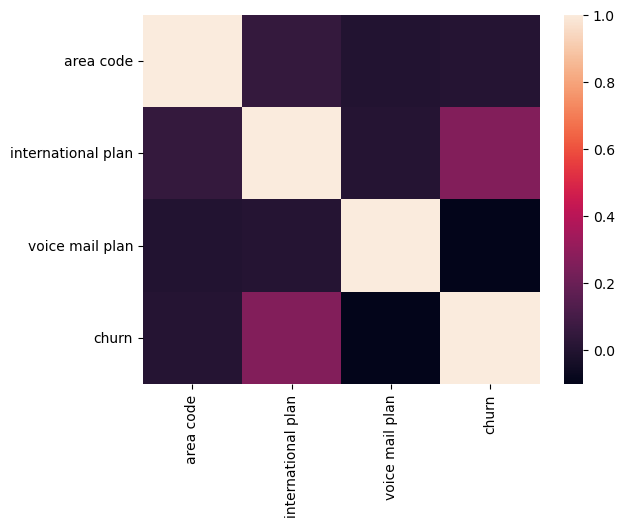

In [16]:
sns.heatmap(df_categorical.corr(), fmt='.2g')

In [17]:
#users with no voice mails as they do not have a voice mail plan
df[df["voice mail plan"]==False]['number vmail messages'].describe()

count    2411.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: number vmail messages, dtype: float64

In [18]:
#users with no international plan are nonetheless able to make international calls
df[df["international plan"]==False]["total intl minutes"].describe()

count    3010.000000
mean       10.195349
std         2.798937
min         0.000000
25%         8.400000
50%        10.200000
75%        12.100000
max        18.900000
Name: total intl minutes, dtype: float64

In [30]:
fig = px.sunburst(df, path=['area code', 'churn'], title='<b>Sunburst Plot of area code and churn<b>')
iplot(fig)

<AxesSubplot:xlabel='area code', ylabel='churn'>

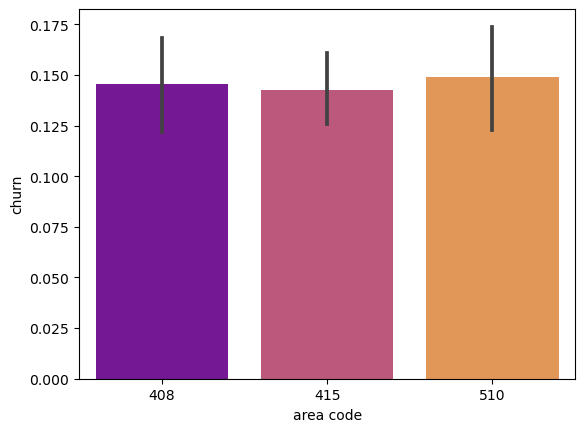

In [20]:
#exploring correlation using bar plot

sns.barplot(x ='area code', y ='churn', data = df, palette ='plasma')

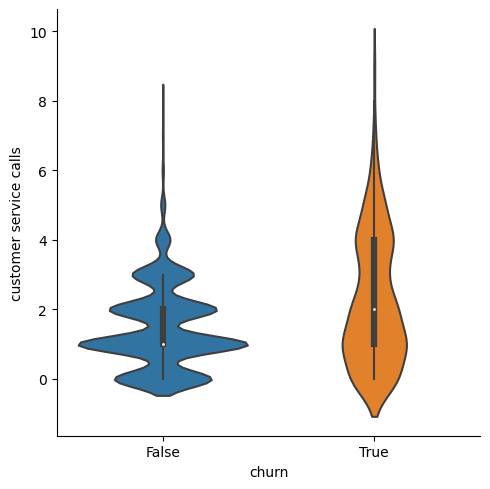

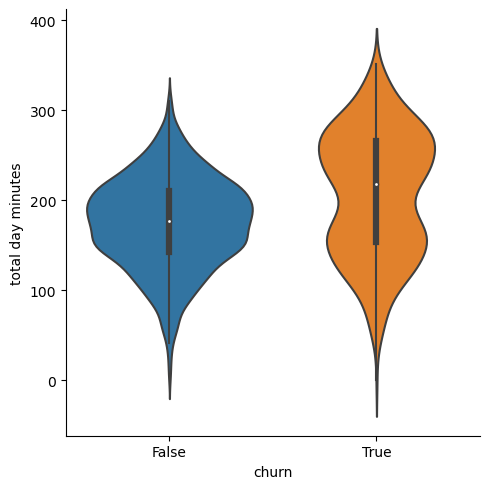

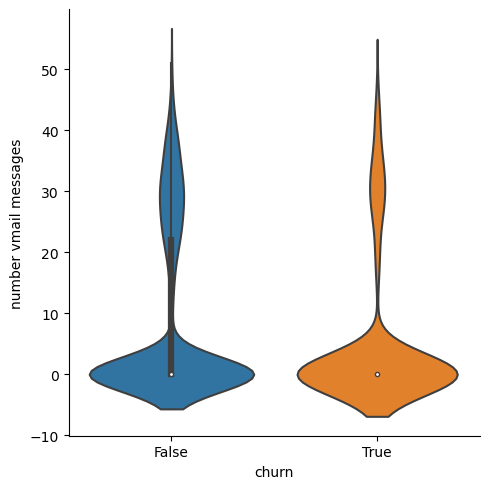

In [21]:
#Exploring possible correlation using violin plot
sns.catplot(y='customer service calls',x='churn',data=df,kind="violin")
sns.catplot(y='total day minutes',x='churn',data=df,kind="violin")
sns.catplot(y='number vmail messages',x='churn',data=df,kind="violin");

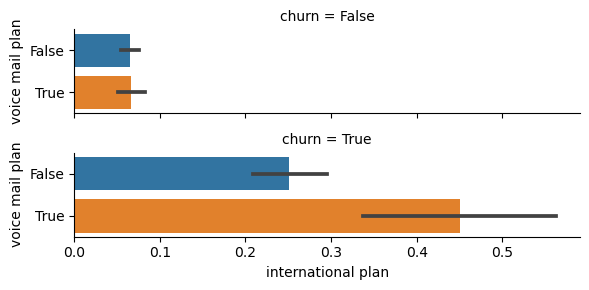

In [22]:
#proportion of people who have a voice mail and international plan have an effect on churn
sns.catplot(y="voice mail plan",x="international plan",row="churn",kind="bar",orient="h",height=1.5,aspect=4,data=df);

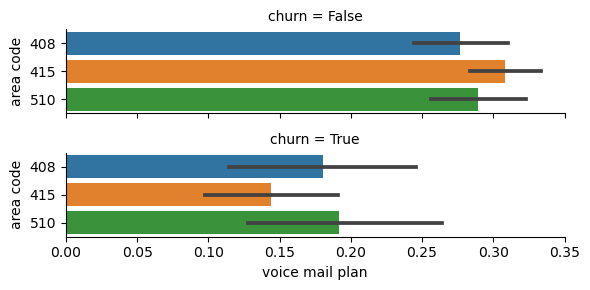

In [23]:
#how area code affects the voice mail plan in the churn 
sns.catplot(y='area code',x='voice mail plan', row="churn",kind="bar", orient="h", height=1.5, aspect=4,data=df);

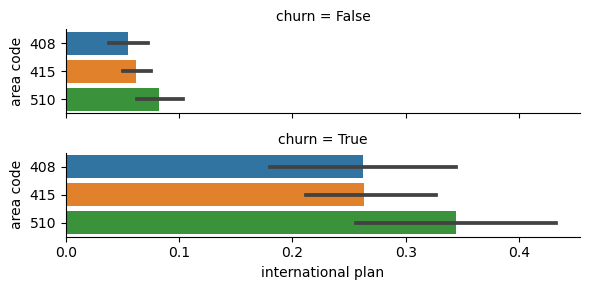

In [24]:
#how area code affects the international plan in the churn 
sns.catplot(y='area code',x='international plan', row="churn",kind="bar", orient="h", height=1.5, aspect=4,data=df);

In [32]:
fig = px.histogram(df, x='customer service calls', color='churn', marginal='box', title='<b>Total customer service calls w.r.t. Churn<b>',
             color_discrete_sequence = ['blue', 'red'])
iplot(fig)

In [25]:
X=df_categorical.drop('churn',axis=1)
y=df_categorical['churn']
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [26]:
#red flag customers

Text(0, 0.5, 'Customer Percentage')

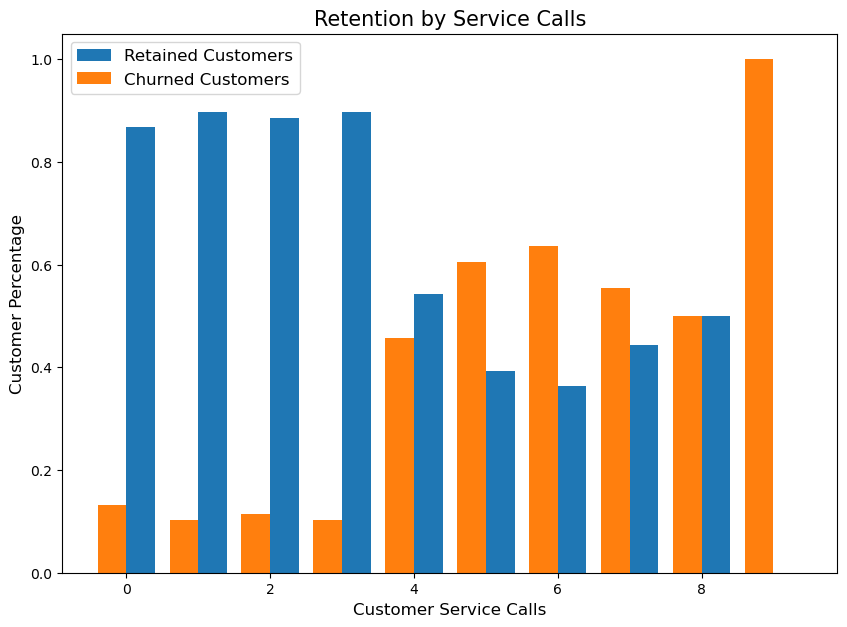

In [27]:
#to define the data
X = list(df['customer service calls'].value_counts().index)
Ychurn = list(df[df['churn']== True].groupby(['customer service calls']).count()['phone number'])
Zretained = list(df[df['churn']== False].groupby(['customer service calls']).count()['phone number'])
Zretained.append(0)

#to define their percentage values
customers_by_cust_calls = np.array(df.groupby(['customer service calls']).count()['phone number'])
percent_churn = (np.array(Ychurn) / customers_by_cust_calls)
percent_non_churn = (np.array(Zretained) / customers_by_cust_calls)
x_axis = np.arange(len(X))

#to create multi bar chart
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(x_axis +0.2, percent_non_churn, width=0.4, label = 'Retained Customers')
plt.bar(x_axis -0.2, percent_churn, width=0.4, label = 'Churned Customers')

#to add legend
plt.legend(fontsize=12)

#to add labels and titles
plt.title("Retention by Service Calls",fontsize=15)
plt.xlabel("Customer Service Calls",fontsize=12)
plt.ylabel("Customer Percentage",fontsize=12)

# multiple customer service calls is a churn red flag